<a href="https://colab.research.google.com/github/manmeet3591/kaggle_experiments/blob/main/Clustering_KMeans_Sentinel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To run an unsupervised classification on satellite data using Python you need GDAL, Numpy and Sklearn. If you wish to see the data you will also need Matplotlib. Assuming you have the libraries installed, import them at the start.
<br>
<br>
Lets start with a single band image

In [1]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bi

In [2]:
!apt-get install libgdal-dev -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgdal-dev is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 61 not upgraded.


In [3]:
!apt-get install python-numpy python-scipy -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-numpy is already the newest version (1:1.13.3-2ubuntu1).
python-numpy set to manually installed.
The following additional packages will be installed:
  python-decorator python-olefile python-pil
Suggested packages:
  python-pil-doc python-pil-dbg python-scipy-doc
The following NEW packages will be installed:
  python-decorator python-olefile python-pil python-scipy
0 upgraded, 4 newly installed, 0 to remove and 61 not upgraded.
Need to get 10.0 MB of archives.
After this operation, 43.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-decorator all 4.1.2-1 [9,300 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-olefile all 0.45.1-1 [33.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 python-pil amd64 5.1.0-1ubuntu0.6 [302 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 pyt

In [6]:
! git clone --recursive https://github.com/acgeospatial/Satellite_Imagery_Python

Cloning into 'Satellite_Imagery_Python'...
remote: Enumerating objects: 188, done.
remote: Total 188 (delta 0), reused 0 (delta 0), pack-reused 188
Receiving objects: 100% (188/188), 18.52 MiB | 26.82 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [11]:
import os
os.chdir('Satellite_Imagery_Python')

In [15]:
!ls Training_data/
!pwd

South_coast.tif		 training.dbf  training.qpj
South_coast.tif.aux.xml  training.prj  training.shp
Training_data.ipynb	 training.qix  training.shx
/content/Satellite_Imagery_Python


In [16]:
import numpy as np
from sklearn import cluster
from osgeo import gdal, gdal_array

# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()

# Read in raster image 
img_ds = gdal.Open('/content/Satellite_Imagery_Python/Training_data/South_coast.tif', gdal.GA_ReadOnly)

band = img_ds.GetRasterBand(2)

img = band.ReadAsArray()
print (img.shape)

X = img.reshape((-1,1))
print (X.shape)


k_means = cluster.KMeans(n_clusters=8)
k_means.fit(X)

X_cluster = k_means.labels_
X_cluster = X_cluster.reshape(img.shape)

print (len(X_cluster))





(519, 751)
(389769, 1)
519


Plot the classified image

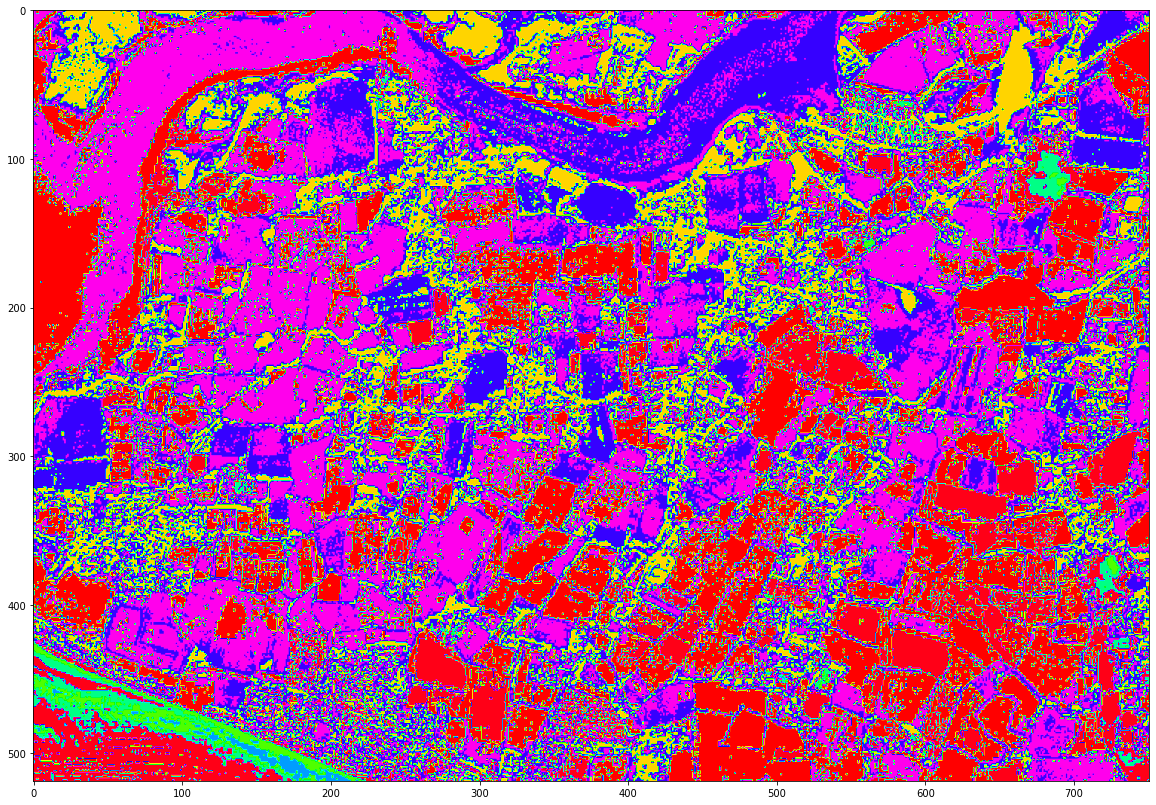

In [17]:
%matplotlib inline  

import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")

plt.show()

What about using all 13 bands of Sentinel 2?

In [18]:
import numpy as np
# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()

# Read in raster image 
img_ds = gdal.Open('/content/Satellite_Imagery_Python/Training_data/South_coast.tif', gdal.GA_ReadOnly)


img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount),
               gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))

for b in range(img.shape[2]):
    img[:, :, b] = img_ds.GetRasterBand(b + 1).ReadAsArray()
    
new_shape = (img.shape[0] * img.shape[1], img.shape[2])
print (img.shape)

print (new_shape)


X = img[:, :, :13].reshape(new_shape)

print (X.shape)

(519, 751, 3)
(389769, 3)
(389769, 3)


In [22]:
img_ds.RasterCount

3

Now fit it

In [19]:
k_means = cluster.KMeans(n_clusters=8)
k_means.fit(X)

X_cluster = k_means.labels_


X_cluster = X_cluster.reshape(img[:, :, 0].shape)



And plot

(519, 751)


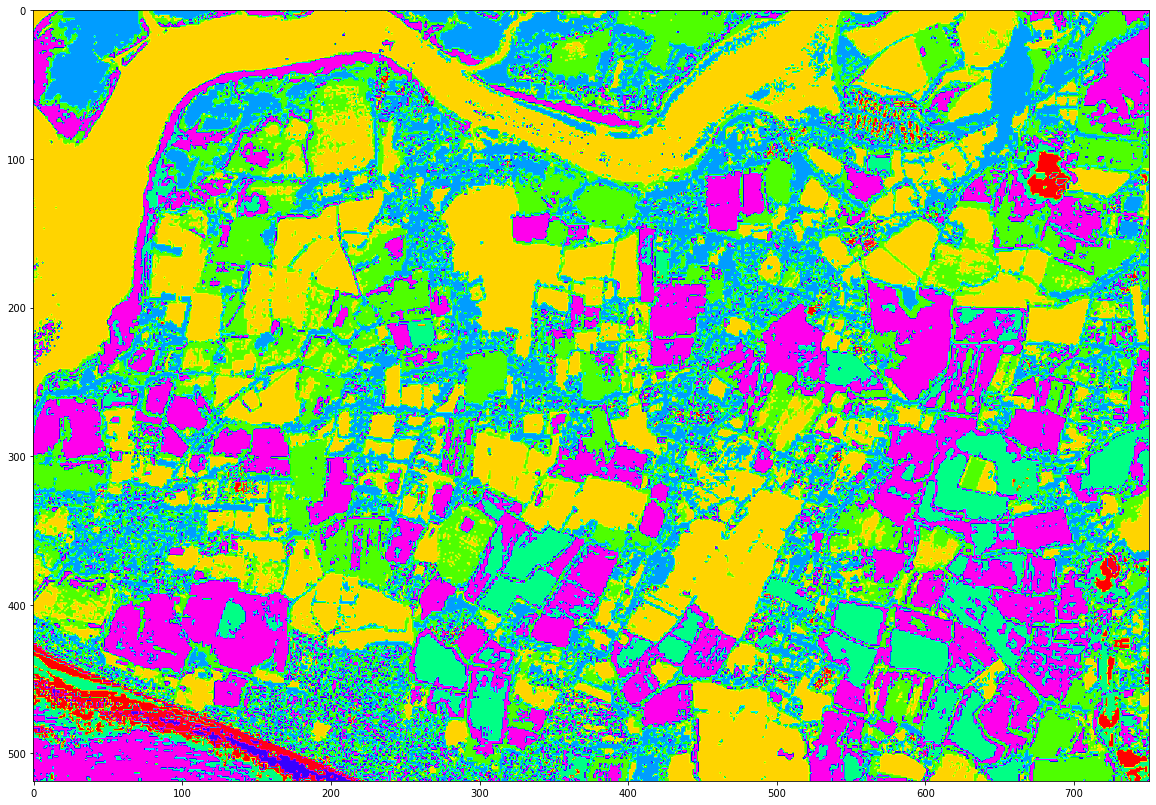

In [21]:
%matplotlib inline  

import matplotlib.pyplot as plt
print (X_cluster.shape)

plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")

plt.show()

Changing the classification is straight forward. In this example choose MiniBatchKMeans

In [23]:
MB_KMeans = cluster.MiniBatchKMeans(n_clusters=8)
MB_KMeans.fit(X)

X_cluster = MB_KMeans.labels_


X_cluster = X_cluster.reshape(img[:, :, 0].shape)

Plot the result

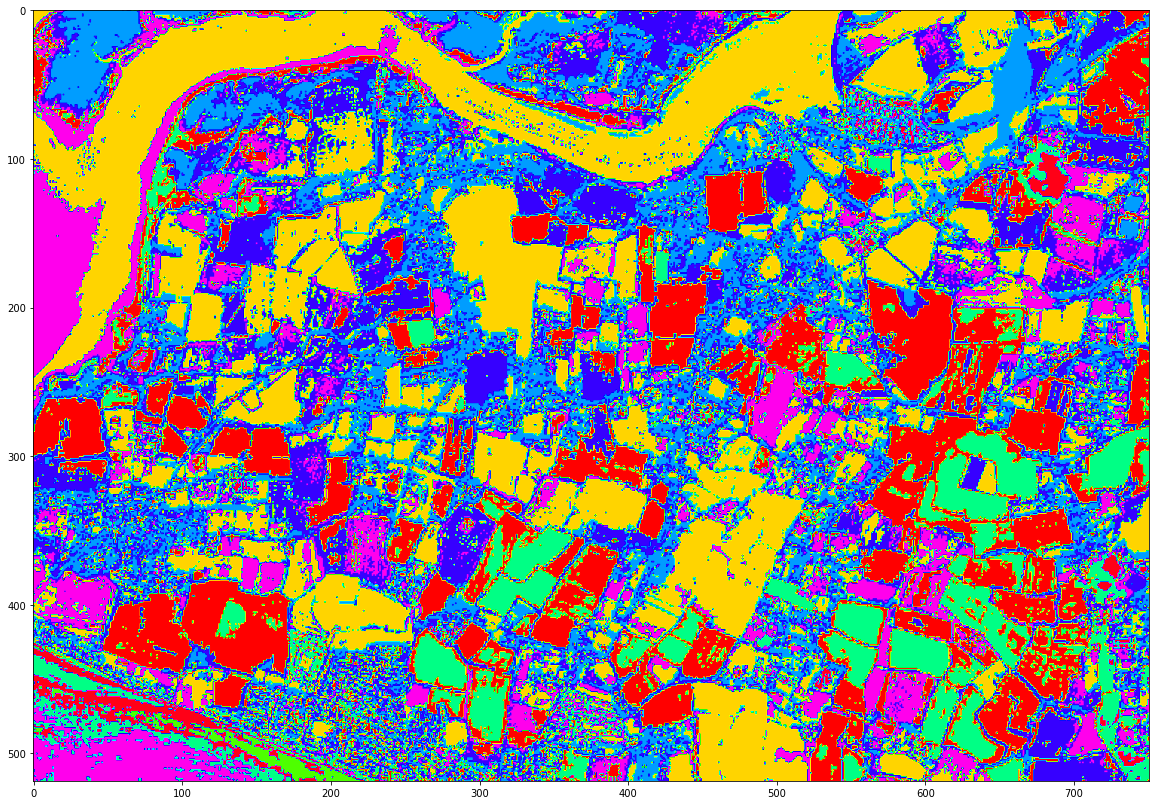

In [24]:
plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")

plt.show()

Final save the result to a bew geotiff

In [25]:
# from osgeo import gdal, gdal_array
# ## write out to tiff
# ### single band raster. 

# ds = gdal.Open(".../S2_may_South_coast_clip.tif")
# band = ds.GetRasterBand(2)
# arr = band.ReadAsArray()
# [cols, rows] = arr.shape

# format = "GTiff"
# driver = gdal.GetDriverByName(format)


# outDataRaster = driver.Create(".../k_means.gtif", rows, cols, 1, gdal.GDT_Byte)
# outDataRaster.SetGeoTransform(ds.GetGeoTransform())##sets same geotransform as input
# outDataRaster.SetProjection(ds.GetProjection())##sets same projection as input


# outDataRaster.GetRasterBand(1).WriteArray(X_cluster)

# outDataRaster.FlushCache() ## remove from memory
# del outDataRaster ## delete the data (not the actual geotiff)